# Bharath Intern

# NAME:MEDURI NIKHESH

# Task 3: Handwritten Digit Recognition Using MNIST Dataset With The Help Of Neural Network.

# Dataset Used : MNIST Dataset

# About Dataset

MNIST is a commonly used dataset in machine learning and computer vision research, which consists of a set of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is split into two sets: a training set of 60,000 images and a test set of 10,000 images. The training set is used to train a machine learning model, while the test set is used to evaluate the model's performance.

In [7]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [10]:
#To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

The Above Code Reflects that the Dataset Contains :

1.An array of 60,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255

2.An array of 60,000 labels, each representing the correct digit (0-9) for the 1.

3.An array of 10,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255.

4.An array of 10,000 labels, each representing the correct digit (0-9) for the 3.

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [15]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [16]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


In [17]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


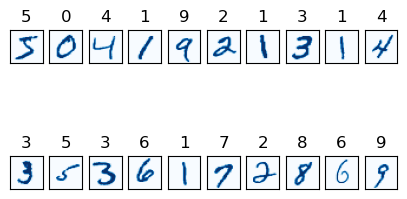

In [18]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [19]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

In [21]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[-0.22198547, -0.4899029 ,  0.78461146,  0.6506438 , -0.02951761,
         0.76082313,  0.11066772, -0.006791  , -0.6635163 , -0.93963706]],
      dtype=float32)

In [24]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.06875526, 0.05259577, 0.1881332 , 0.16454475, 0.08334772,
        0.18371063, 0.09589045, 0.08526361, 0.04421316, 0.03354546]],
      dtype=float32)

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [27]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2993 - accuracy: 0.9122
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1468 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1107 - accuracy: 0.9661
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0898 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0792 - accuracy: 0.9756


In [28]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0714 - accuracy: 0.9782 - 312ms/epoch - 998us/step


[0.0714307501912117, 0.9782000184059143]

In [29]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.4617419e-08, 1.1303860e-08, 2.7276374e-06, 8.0848564e-05,
        1.1055829e-12, 4.3432827e-08, 1.2237255e-14, 9.9991500e-01,
        6.7006027e-08, 1.3097512e-06],
       [2.9674405e-09, 2.6315771e-04, 9.9966121e-01, 5.2146112e-05,
        2.9475429e-14, 2.2842929e-05, 4.3573232e-07, 3.0191244e-13,
        8.0923563e-08, 8.3019148e-15],
       [3.3777823e-07, 9.9978322e-01, 4.5684526e-05, 1.2826265e-05,
        2.6939674e-06, 7.3839061e-07, 1.9909674e-05, 1.1984909e-04,
        1.4770405e-05, 2.0417408e-08],
       [9.9991775e-01, 7.0695858e-09, 1.2136476e-05, 4.1827792e-07,
        2.3740624e-08, 1.0950295e-05, 3.5084246e-05, 1.9790488e-05,
        7.9196042e-08, 3.8094611e-06],
       [1.9439592e-06, 1.9372555e-10, 1.5259315e-06, 3.3394691e-08,
        9.9767917e-01, 2.2392312e-08, 1.4026905e-07, 3.1769694e-05,
        2.3045040e-07, 2.2852318e-03]], dtype=float32)>

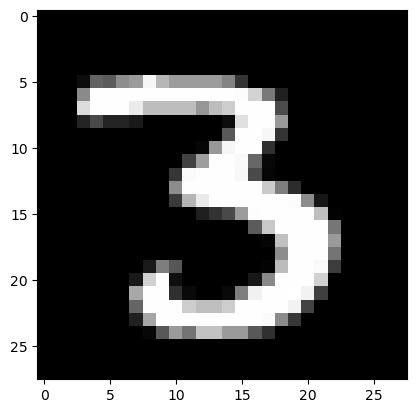

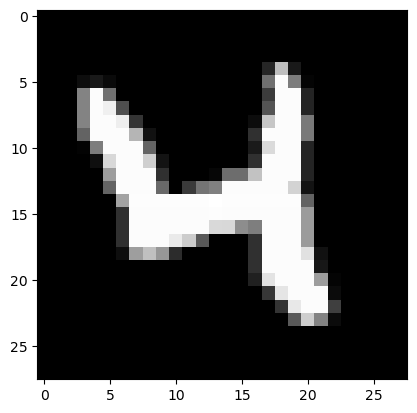

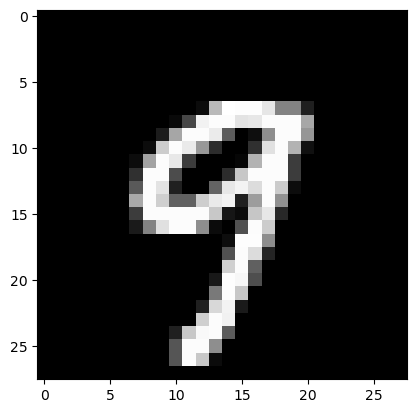

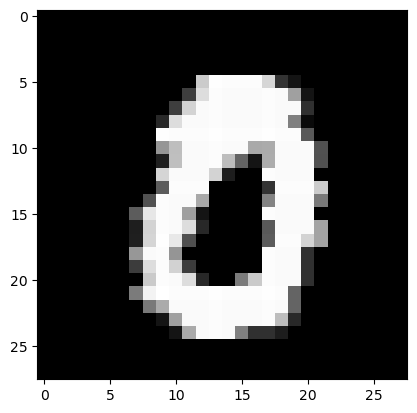

In [35]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()
# Displaying a Grayscale Image
img1 = x_train[20]
plt.imshow(np.squeeze(img1) ,cmap='gray')
plt.show()
# Displaying a Grayscale Image
img2 = x_train[45]
plt.imshow(np.squeeze(img2) ,cmap='gray')
plt.show()
# Displaying a Grayscale Image
img3 = x_train[69]
plt.imshow(np.squeeze(img3) ,cmap='gray')
plt.show()


In [36]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 14ms/step
predicted : 3


In [37]:
# Predicting the Result
img1= img1.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img1])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 10ms/step
predicted : 4


In [38]:
# Predicting the Result
img2= img2.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img2])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 11ms/step
predicted : 9


In [39]:
# Predicting the Result
img3= img3.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img3])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 7ms/step
predicted : 0
